# Large Language Model - LLaMA
## 학습 목표
1. 대표적인 오픈소스 LLM인 LLaMA 모델을 활용해 본다.
2. In-context learning을 활용하여 분류 문제를 풀어본다.

**context**
1. LLaMA 활용하기
2. In-context learning을 활용한 뉴스 제목 분류

**실습 데이터 준비**

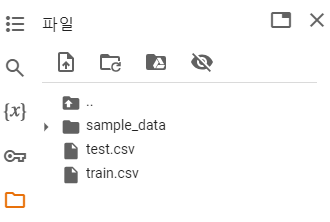

1. 좌측에 있는 파일 탭을 클릭한다.
2. data 폴더 내에 있는 train.csv와 test.csv를 드래그 & 드롭으로 업로드하거나, 업로드 버튼을 눌러 업로드한다.  

## LLaMA 활용하기
> LLaMA

LLaMA(Large Language Model Meta AI)는 메타에서 개발한 오픈소스 언어모델로, 다양한 크기(7B, 13B, 33B, 65B)의 모델을 공개하고 있다.

해당 모델을 사용하기 위해선 메타의 승인이 필요하지만, 승인받는 과정은 어렵지 않으며, 이는 더 최신 모델인 Llama2 역시 마찬가지이다.

준수한 성능과 오픈소스 LLM인 LLaMA에 대한 자세한 정보는 [메타 공식 블로그](https://ai.meta.com/blog/)에서 확인할 수 있다.

본 실습에선 LLaMA 7B의 가중치를 [transformers](https://huggingface.co/huggyllama/llama-7b)에서 불러와 사용할 것이다. 해당 페이지에 아래와 같은 라이센스 관련 문구가 있으므로 사용에 유의해야 한다.

```
This contains the weights for the LLaMA-7b model.
This model is under a non-commercial license (see the LICENSE file).
You should only use this repository if you have been granted
access to the model by filling out this form but either
lost your copy of the weights or got some trouble
converting them to the Transformers format.
```

> Quantization

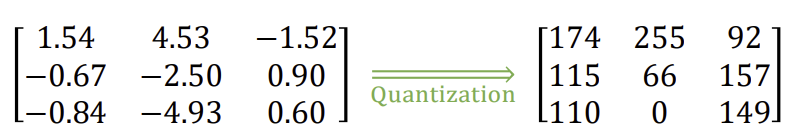

크기가 큰 언어 모델은 추론 시에 메모리 요구량이 많으며, 오랜 시간이 소요된다.

Quantization이란 더 적은 메모리를 사용하고, 더 빠른 추론을 할 수 있도록 하는 기술이다.

일반적으로 실수로 이루어진 가중치 행렬을 정수로 이루어진 가중치 행렬로 변환하는 과정을 거친다.

이때, 실수(32bit, 16bit)보다 정수(8bit, 4bit)의 크기가 작으므로 메모리 요구량이 감소하고, 연산 속도 또한 빨라질 수 있다.

또한, 일반적으로 Quantization은 학습 단계가 아닌 추론 단계에서 효율적인 응답 생성을 위해 사용된다.

더욱 자세한 내용은 [이곳](https://huggingface.co/docs/optimum/concept_guides/quantization)에서 확인할 수 있다.



In [ ]:
! pip install transformers[torch] sentencepiece accelerate bitsandbytes datasets

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import torch
from transformers import LlamaTokenizer, AutoModelForCausalLM

tokenizer = LlamaTokenizer.from_pretrained("huggyllama/llama-7b")
model = AutoModelForCausalLM.from_pretrained(
    "huggyllama/llama-7b",
    load_in_8bit=True, # bitsandbytes를 통해 8bit로 Quantization하여 모델을 불러온다.
    torch_dtype=torch.float16,
    device_map='auto'
).eval() # Quantization은 일반적으로 추론을 위해 사용되므로 모델을 평가 모드로 설정한다.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/594 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
tokenizer.eos_token_id

2

In [ ]:
encodings = tokenizer(
    "Seoul is the capital city of",
    return_tensors='pt'
)
print(encodings) # input_ids와 attention_mask가 있다.

{'input_ids': tensor([[    1, 12931,  4161,   338,   278,  9687,   310]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
outputs = model.generate(
    max_length=20, # 생성할 토큰의 최대 길이를 지정한다.
    **encodings.to(model.device)
)
print(outputs)

tensor([[    1, 12931,  4161,   338,   278,  9687,   310,   278, 27379, 29889,
            13, 29902, 30010, 29885,   451,  1854,   565,   306, 30010,   345,
          3926,  5276,   445,  1434, 29892,   541,   306, 30010, 29885,   263,
         12176, 13524]], device='cuda:0')


In [ ]:
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Kimchi is the food of the gods.
I’m not sure if I’ve ever mentioned this before, but I’m a huge fan


In [ ]:
from transformers import StoppingCriteria, StoppingCriteriaList
import torch

# 모델의 생성을 멈출 문자를 지정하기 위한 클래스이다.
class StopWordCriteria(StoppingCriteria):
    def __init__(self, stop: str, tokenizer: LlamaTokenizer) -> None:
        StoppingCriteria.__init__(self)
        self.stop = stop
        self.tokenizer = tokenizer

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor) -> bool: # 토큰을 하나 생성할 때마다 실행되며, Boolean을 반환한다. True를 반환한다면 생성을 중단한다.
        return any(
            decoded.endswith(self.stop)
            for decoded in self.tokenizer.batch_decode(input_ids)
        )

def completion(prompt, stop: str=None, **kwargs):
    return tokenizer.decode(
        model.generate(
            # 위에서 정의한 클래스를 입력한다.
            stopping_criteria=StoppingCriteriaList([StopWordCriteria(stop, tokenizer)])\
                              if stop is not None else None,
            max_length=128, # 생성할 토큰의 최대 길이를 지정한다.
            **dict(
                tokenizer(prompt, return_tensors='pt').to(model.device),
                **kwargs
            )
        )[0],
        skip_special_tokens=True
    )

print(completion("Seoul is the capital city of", stop='\n'))


Seoul is the captial city of South Korea. It is a very modern city with a population of 10 million. It is a very busy city with lots of traffic and lots of people.



In [ ]:
zero_shot = """\
Translate English to Korean:
I like playing soccer =>\
"""

one_shot = """\
Translate English to Korean:
I go to school => 나는 학교에 갑니다
I like playing soccer =>\
"""

few_shot = """\
Translate English to Korean:
I go to school => 나는 학교에 갑니다
You must do your work => 너는 너의 일을 해야만 해
We don't how it work => 우리는 그것이 어떻게 작동하는지 몰라
I like playing soccer =>\
"""

In [ ]:
print("Zero-shot)", completion(zero_shot, stop='\n'), sep='\n')
print("One-shot)", completion(one_shot, stop='\n'), sep='\n')
print("Few-shot)", completion(few_shot, stop='\n'), sep='\n')

Zero-shot)
Translate English to Korean:
I like playing soccer => 저는 축구 즐겨보다 좋아요.

One-shot)
Translate English to Korean:
I go to school => 나는 학교에 갑니다
I like playing soccer => 축구를 좋아합니다

Few-shot)
Translate English to Korean:
I go to school => 나는 학교에 갑니다
You must do your work => 너는 너의 일을 해야만 해
We don't how it work => 우리는 그것이 어떻게 작동하는지 몰라
I like playing soccer => 나는 축구를 좋아해요



LLaMA는 주로 영어로 학습되었으며, 한국어에 대해서 명시적으로 학습되어 있지 않다.

따라서 영어가 아닌 다른 언어에 대해서 의도치 않은 결과가 발생할 수 있다.

## In-context learning을 활용한 뉴스 제목 분류
> In-context learning의 활용성

앞선 GPT3 실습에서 In-context learning을 통해 번역과 감정 분석을 수행해 보았다.

본 실습에선 In-context learning을 통해 뉴스 제목을 4가지 라벨(world, sports, business, science)로 분류해 볼 것이다.

이처럼 In-context learning을 통해 LLM을 추가 학습 하지 않고도 다양한 태스크를 수행할 수 있다.

In [ ]:
from datasets import load_dataset, Dataset

LABEL = ["world", "sports", "business", "science"] # 4개의 라벨

dataset = load_dataset("csv", data_files={"train": "train.csv", "test": "test.csv"})

print(dataset)
print(dataset['test'][0]) # label과 text로 이루어져 있다.

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 7600
    })
})
{'label': 2, 'text': "Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."}


In [ ]:
import random

# 프롬프트를 생성하는 함수
def make_prompt(
    target: list[str]|str, k: int=0, dataset: Dataset|None=None,
    text_format: str="{text} =>",
    label_format: str=" {label}\n",
    initial_prompt: str="Categorize the given news headlines into the following four categories: %s\n" % ", ".join(LABEL)
):
    target = [target] if isinstance(target, str) else target
    prompts = []

    for sentence in target:
        prompt = initial_prompt
        random.seed(hash(sentence)) # seed를 고정한다.

        # In-context example을 프롬프트에 추가하는 코드
        for _ in range(k): # shot이라 불리며, In context example의 개수를 칭한다. (k=2면 2-shot learning이다.)
            sample = dataset[random.randint(0, len(dataset)-1)] # dataset에서 랜덤으로 데이터를 추출한다
            prompt += text_format.format(text=sample['text']) + label_format.format(label=LABEL[sample['label']]) # In-context example을 prompt에 더해준다.

        prompts.append(prompt + text_format.format(text=sentence)) # 정답을 구하고 싶은 문장을 더해준다.

    return prompts if len(prompts) > 1 else prompts[0]

In [ ]:
SAMPLE = dataset['test'][0]
print("Target-Label:", LABEL[SAMPLE['label']])
print("\nZero-shot)", make_prompt(SAMPLE['text'], k=0), sep="\n")
print("\nOne-shot)", make_prompt(SAMPLE['text'], k=1, dataset=dataset['train']), sep="\n")
print("\nFew-shot)", make_prompt(SAMPLE['text'], k=4, dataset=dataset['train']), sep="\n")

Target-Label: business

Zero-shot)
Categorize the given news headlines into the following four categories: world, sports, business, science
Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul. =>

One-shot)
Categorize the given news headlines into the following four categories: world, sports, business, science
Wall Street Doubts Kmart Strategy Since emerging from bankruptcy in May 2003, the company has undergone a dramatic turnaround, seen an almost eight-fold increase in its stock price and now plans to buy department store operator Sears, Roebuck (S:NYSE - news - research) for about \$11  => business
Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul. =>

Few-shot)
Categorize the given news headlines into the following four categories: world, sports, business, science


In [ ]:
from functools import partial

# 앞서 정의한 make_prompt 함수를 데이터셋에 적용하기 위해 전처리 함수를 정의한다.
def preprocess(sample, prompter, k: int=0, dataset: Dataset|None=None):
    return tokenizer(prompter(sample['text'], k=k, dataset=dataset), return_length=True)

# 정의한 preprocess를 데이터셋에 적용한다.
# partial은 새로운 함수를 만들 때 사용할 수 있는 함수로, 인자가 이미 채워져 있는 함수를 정의할 수 있다.
zero_shots = dataset['test'].map(partial(preprocess, prompter=make_prompt), batched=True, remove_columns=["text"])
one_shots = dataset['test'].map(partial(preprocess, prompter=make_prompt, k=1, dataset=dataset['train']), batched=True, remove_columns=["text"])
few_shots = dataset['test'].map(partial(preprocess, prompter=make_prompt, k=4, dataset=dataset['train']), batched=True, remove_columns=["text"])

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
print(few_shots[0]) # label, input_ids, attention_mask, length로 이루어져 있다.

{'label': 2, 'input_ids': [1, 315, 20440, 675, 278, 2183, 9763, 2343, 9012, 964, 278, 1494, 3023, 13997, 29901, 3186, 29892, 14717, 29892, 5381, 29892, 10466, 13, 29956, 497, 7103, 19176, 29890, 1372, 476, 28402, 3767, 8963, 4001, 11176, 3460, 515, 9124, 6685, 1270, 297, 2610, 29871, 29906, 29900, 29900, 29941, 29892, 278, 5001, 756, 1090, 29887, 650, 263, 8541, 2454, 2507, 11316, 29892, 3595, 385, 4359, 9475, 29899, 8771, 7910, 297, 967, 10961, 8666, 322, 1286, 13900, 304, 15649, 14311, 3787, 5455, 317, 15451, 29892, 1528, 774, 2707, 313, 29903, 29901, 29940, 29979, 1660, 448, 9763, 448, 5925, 29897, 363, 1048, 20282, 29896, 29896, 29871, 1149, 5381, 13, 16376, 5084, 24161, 408, 4052, 19169, 273, 12624, 297, 1023, 27656, 28050, 4052, 19169, 273, 471, 385, 1156, 29899, 386, 1774, 363, 278, 8314, 6282, 322, 15772, 9446, 964, 278, 4321, 3815, 29889, 20628, 540, 20139, 1623, 278, 15905, 322, 471, 1010, 25724, 491, 263, 1067, 6463, 287, 3458, 448, 9644, 545, 3692, 304, 1065, 470, 4480, 298

In [ ]:
print([tokenizer.encode(label, add_special_tokens=False) for label in LABEL])
label_ids = [tokenizer.encode(label, add_special_tokens=False)[0] for label in LABEL]

# 각 라벨이 token_id로 인코딩된 것을 확인할 수 있다.
print("3168 -> ", tokenizer.decode(3186))
print("14717 -> ", tokenizer.decode(14717))
print("5381 -> ", tokenizer.decode(5381))
print("10466 -> ", tokenizer.decode(10466))

[[3186], [14717], [5381], [10466]]
3168 ->  world
14717 ->  sports
5381 ->  business
10466 ->  science


In [ ]:
tokenizer.add_special_tokens({'pad_token': '[PAD]'}) # 배치화하여 추론하기 위해 PAD 토큰을 추가한다.
model.resize_token_embeddings(len(tokenizer)) # 토큰이 새롭게 추가되었기에, 임베딩 행렬의 크기를 재조정해야 한다.
tokenizer.padding_side = "right" # left

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding
from tqdm.notebook import tqdm

# 예시 배치 (batch size:2, length=128)
# ... Pennington Reaches Long-Term Deal with Jets  NEW YORK (Sports Network) - The New York Jets and  quarterback Chad Pennington finally agreed on a long-term  contract extension Wednesday. =>
# ... Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul. => [PAD] [PAD] ...

@torch.inference_mode()
def get_accuracy(model: AutoModelForCausalLM, dataset: Dataset, batch_size: int):
    collator = DataCollatorWithPadding(tokenizer) # DataColloatorWithPadding을 통해 배치화 시 패딩을 사용한다.
    loader = DataLoader(dataset, batch_size=batch_size, collate_fn=collator, shuffle=False)

    trues = 0
    for sample in tqdm(loader):
        sample = sample.to(model.device) # input_ids와 attention_mask의 크기 :  (batch_size, length) -> (2, 128)
        lengths = sample.pop("length") # (batch_size) -> (2)
        labels = sample.pop("labels") # (batch_size) -> (2)
        outputs = model(**sample) # outputs.logits의 크기 : (batch_size, seq_len, vocab_size) -> (2, 128, 32001)
        logits = outputs.logits[torch.arange(len(lengths), device=lengths.device), lengths-1] # 마지막 토큰 자리의 representation을 추출한다. (batchsize, vocab_size) -> (2, 32001)

        prediction = logits[..., label_ids] # 4개의 라벨의 token_id에 해당하는 로짓들을 추출한다. (batchsize, len(label_ids)) -> (2,4)
        prediction = prediction.argmax(-1) # 4개의 라벨 중 값이 가장 큰 라벨을 예측값으로 선택한다. (batchsize) -> (2)

        trues += (labels == prediction).sum().item() # 맞춘 개수를 누적 합한다.

        del sample, lengths, labels, outputs, prediction, logits
        torch.cuda.empty_cache()

    return trues / len(dataset)

print("Zero-shot Accuracy:", get_accuracy(model, zero_shots, batch_size=16))
print("One-shot Accuracy:", get_accuracy(model, one_shots, batch_size=8))
print("Few-shot Accuracy:", get_accuracy(model, few_shots, batch_size=4))


  0%|          | 0/475 [00:00<?, ?it/s]

Zero-shot Accuracy: 0.3538157894736842


  0%|          | 0/950 [00:00<?, ?it/s]

One-shot Accuracy: 0.6660526315789473


  0%|          | 0/1900 [00:00<?, ?it/s]

Few-shot Accuracy: 0.7261842105263158


* Zero-shot: 35.4%
* One-shot: 66.6%
* Few-shot: 72.6%

한편, 어떠한 Prompt를 활용하느냐에 따라 LLM의 성능은 크게 달라진다.

In [ ]:
make_improved_prompt = partial(
    make_prompt,
    text_format="{text} This news is about",
    label_format=" {label}.\n"
)

print("Target-Label:", LABEL[SAMPLE['label']])
print("\nZero-shot)", make_improved_prompt(SAMPLE['text'], k=0), sep="\n")
print("\nOne-shot)", make_improved_prompt(SAMPLE['text'], k=1, dataset=dataset['train']), sep="\n")
print("\nFew-shot)", make_improved_prompt(SAMPLE['text'], k=4, dataset=dataset['train']), sep="\n")

Target-Label: business

Zero-shot)
Categorize the given news headlines into the following four categories: world, sports, business, science
Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul. This news is about

One-shot)
Categorize the given news headlines into the following four categories: world, sports, business, science
Wall Street Doubts Kmart Strategy Since emerging from bankruptcy in May 2003, the company has undergone a dramatic turnaround, seen an almost eight-fold increase in its stock price and now plans to buy department store operator Sears, Roebuck (S:NYSE - news - research) for about \$11  This news is about business.
Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul. This news is about

Few-shot)
Categorize the given news headlines into the following f

In [ ]:
zero_shots = dataset['test'].map(partial(preprocess, prompter=make_improved_prompt), batched=True, remove_columns=["text"])
one_shots = dataset['test'].map(partial(preprocess, prompter=make_improved_prompt, k=1, dataset=dataset['train']), batched=True, remove_columns=["text"])
few_shots = dataset['test'].map(partial(preprocess, prompter=make_improved_prompt, k=4, dataset=dataset['train']), batched=True, remove_columns=["text"])

print("Zero-shot Accuracy:", get_accuracy(model, zero_shots, batch_size=16))
print("One-shot Accuracy:", get_accuracy(model, one_shots, batch_size=8))
print("Few-shot Accuracy:", get_accuracy(model, few_shots, batch_size=4))

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

  0%|          | 0/475 [00:00<?, ?it/s]

Zero-shot Accuracy: 0.7251315789473685


  0%|          | 0/950 [00:00<?, ?it/s]

One-shot Accuracy: 0.6190789473684211


  0%|          | 0/1900 [00:00<?, ?it/s]

Few-shot Accuracy: 0.7201315789473685


Accuracy with an improved prompt:
* Zero-shot: 72.5%
* One-shot: 61.9%
* Few-shot: 72.0%

> In context learning의 장점

만약 전체 데이터 셋을 활용하여 BERT 모델을 학습시킨다면 91.7%의 정확도가 나온다.

이처럼 In context learning은 BERT와 같은 언어 모델을 특정 데이터로 직접 학습하는 것 보다 성능이 높지 않을 수 있다.

하지만, 파라미터 개수가 매우 많은 LLM을 수행하고자 하는 태스크들에 각각 학습하는 것은 너무 많은 리소스가 수반되며, 더군다나 LLM의 크기는 점점 증가하고 있다. 또한 학습에 사용할 대량의 데이터를 확보하기가 어려울 수 있다.

따라서 In context learning은 모델을 직접 학습하는 것보다 성능은 낮을 수 있지만, 하나의 모델을 통해 다양한 태스크를 수행할 수 있게 하는 것이 가장 큰 장점이다.